# A practical Guide to Feature Engineering in Python

Feature engineering is one of the most important skills needed in data science and machine learning. It has a major influence on the performance of machine learning models and even the quality of insights derived during exploratory data analysis (EDA).

In this article, we’re going to learn some important techniques and tools that will help you properly extract, prepare, and engineer features from your dataset.

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

Data from Kaggle:

https://www.kaggle.com/antfarol/car-sale-advertisements

https://www.kaggle.com/satadru5/car-sale-prediction

# 1. Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Configuration
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# 2. Common function

In [2]:
def Predictive_Model(num_df, cat_df, target):
    
    
    # merge num_df and dummy cat_df
    if(cat_df.shape[0] > 0):
        input_df = pd.concat([num_df,cat_df],axis=1)
    else:
        input_df = num_df.copy()
    
    # scaling features for numerical vars
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(input_df)
    scaled_df = scaler.transform(input_df)
    input_df = pd.DataFrame(scaled_df, columns = input_df.columns)
        
    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(input_df, df[target], test_size=0.2, random_state=365)
    
    # build model
    import statsmodels.api as sm
    X = sm.add_constant(X_train)
    results = sm.OLS(y_train, X).fit()
    
    # return result
    print(results.summary())
    
    # print Rsquare of train set and test sest
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print('Train set score: ', reg.score(X_train, y_train))
    print('Test set score: ', reg.score(X_test, y_test))

In [3]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(141)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(142)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(143)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
       
    ## scatter plot
    plt.subplot(144)
    plt.scatter(df[var],df[target])
    plt.title('scatter plot')
    
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

# 3. Loading the raw data

In [4]:
df = pd.read_csv('CarSale.csv')
org_df = df.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# 4. Data Preprocessing for Numerical vars

In [7]:
target = 'Price'
num_vars = [var for var in df.columns if df[var].dtypes != 'O' and var != target]
num_df = df[num_vars]
cat_df = pd.DataFrame()

## 4.1. Data Overview

In [8]:
num_df.head()

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011


## 4.2. Dealing with missing values

#### Removing rows with missing values

In [5]:
print('Original shape: ', df.shape)
df = df.dropna(axis=0)
print('After removing data: ', df.shape)

df = df.reset_index(drop=True)
cleaned_df = df.copy()

Original shape:  (4345, 9)
After removing data:  (4025, 9)


In [6]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## 4.3. Exploring distribution

Notice the minimum and maximum values with respect to the 

#### Distribution of target var

Skewness: 4.444409
Kurtosis: 28.929701


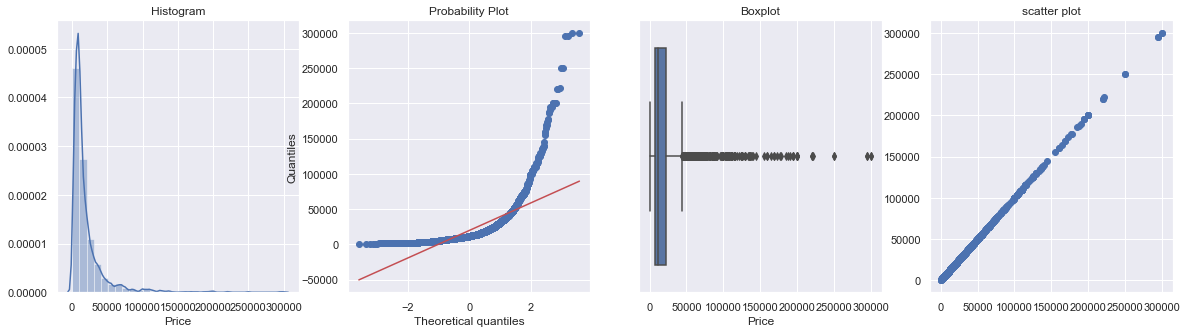

In [9]:
analyse_continuous(df,'Price',target)

#### Distribution of Independent Variable

Skewness: 0.700196
Kurtosis: 1.809798


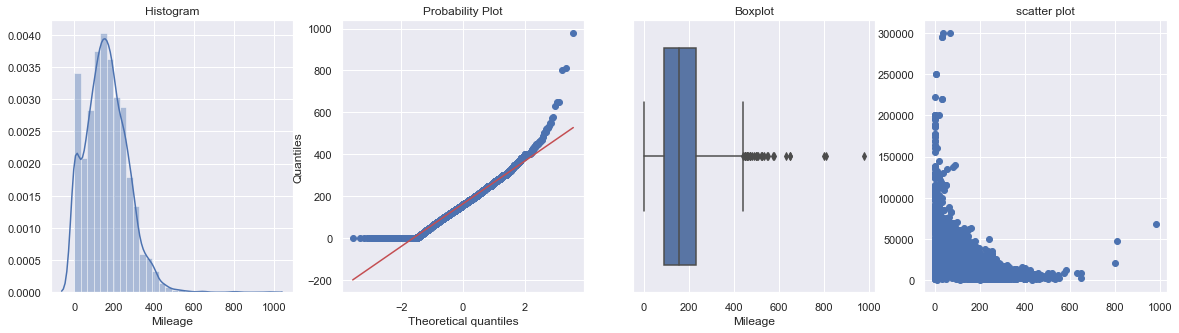

Skewness: 17.154962
Kurtosis: 316.181652


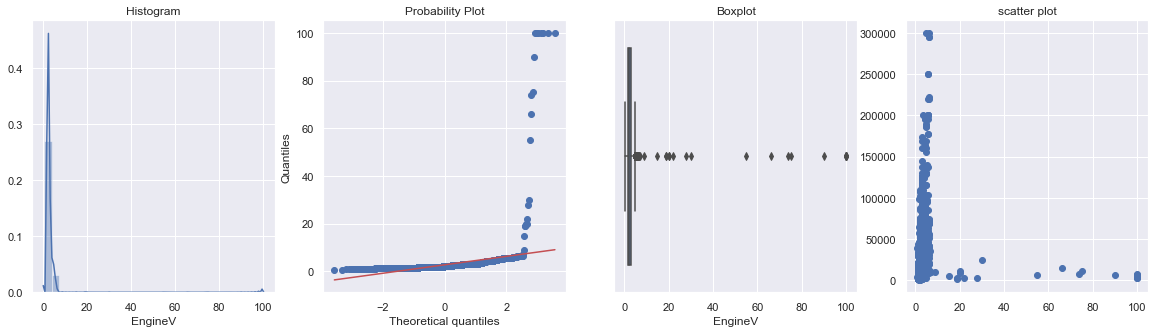

Skewness: -0.963945
Kurtosis: 0.999387


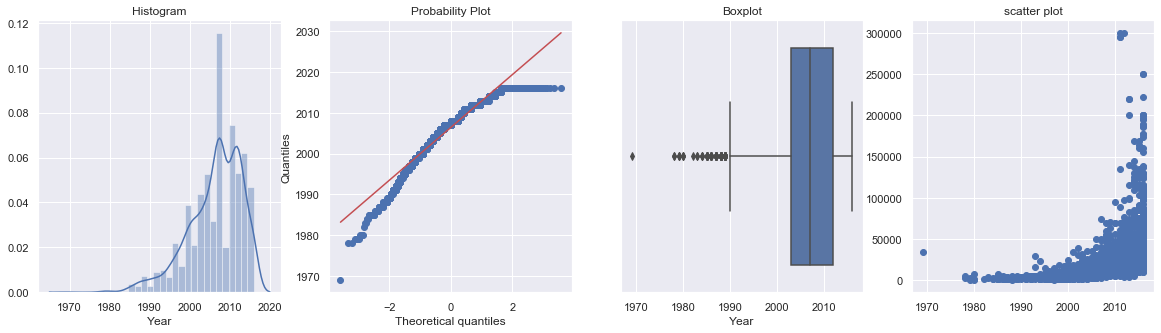

In [10]:
for var in num_vars:
    analyse_continuous(df,var,target)

## 4.4. Numvars without preprocessing

#### Exp 1:  Use only numerical vars

In [11]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     409.0
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          4.92e-225
Time:                        06:07:23   Log-Likelihood:                -36910.
No. Observations:                3220   AIC:                         7.383e+04
Df Residuals:                    3216   BIC:                         7.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.98e+04    405.829     48.787      0.0

## 4.5. Treating outliers

In [12]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [13]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [14]:
df.shape

(4025, 9)

### Exp 2:  numerical vars + Handling outliers

In [15]:
#df = cleaned_df.copy()

Year

Skewness: -0.963945
Kurtosis: 0.999387


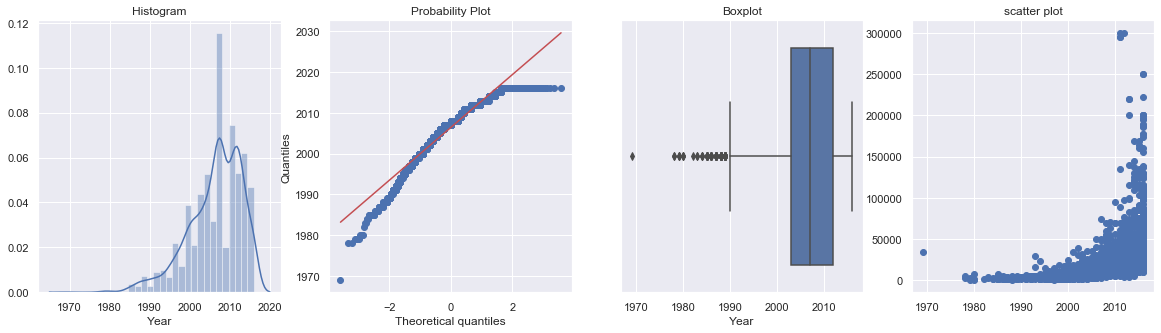

In [16]:
analyse_continuous(df,'Year',target)

In [17]:
# calculate boundaries for Year
upper_boundary, lower_boundary = find_normal_boundaries(df, 'Year')
upper_boundary, lower_boundary

(2026.46641322036, 1986.292841438025)

In [18]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Year (right end outliers): {}'.format(
    len(df[df['Year'] > upper_boundary])))

print('cars with less than lower_boundary of Year (left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Year'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary]) / len(df)))

total number of Year: 4025
cars with more than upper_boundary of Year (right end outliers): 0
cars with less than lower_boundary of Year (left end outliers: 38

% right end outliers: 0.0
% left end outliers: 0.009440993788819876


In [19]:
df = df[(df.Year < upper_boundary) & (df.Year > lower_boundary)]
df = df.reset_index(drop=True)
df.shape

(3987, 9)

Skewness: -0.762869
Kurtosis: 0.201604


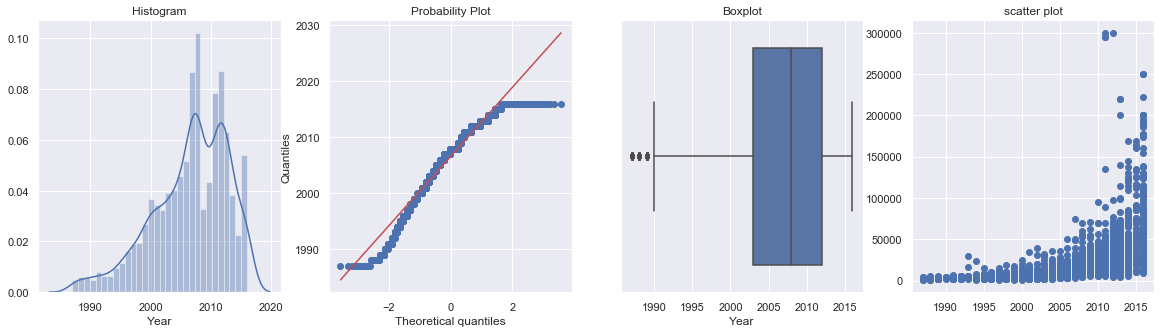

In [20]:
analyse_continuous(df,'Year',target)

Mileage

Skewness: 0.706495
Kurtosis: 1.868399


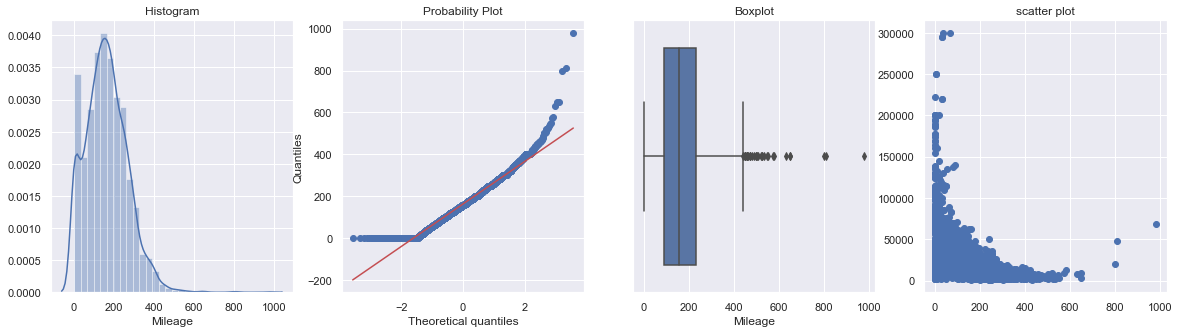

In [21]:
analyse_continuous(df,'Mileage',target)

In [22]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'Mileage', 2)
upper_boundary, lower_boundary

(510.0, -190.0)

In [23]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['Mileage'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Mileage'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary]) / len(df)))

total number of Year: 3987
cars with more than upper_boundary of Mileage (right end outliers): 14
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.003511412089290193
% left end outliers: 0.0


In [24]:
df = df[(df.Mileage < upper_boundary) & (df.Mileage > lower_boundary)]
df = df.reset_index(drop = True)
df.shape

(3973, 9)

Skewness: 0.368103
Kurtosis: -0.178503


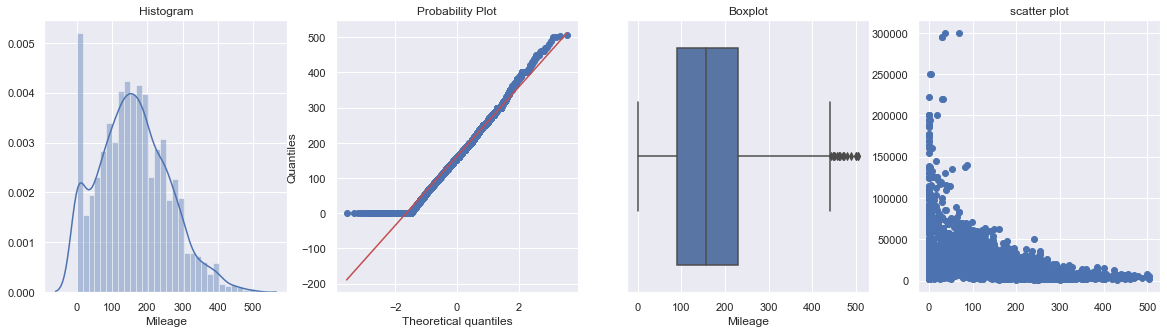

In [25]:
analyse_continuous(df,'Mileage',target)

EngineV

Skewness: 17.049629
Kurtosis: 312.213441


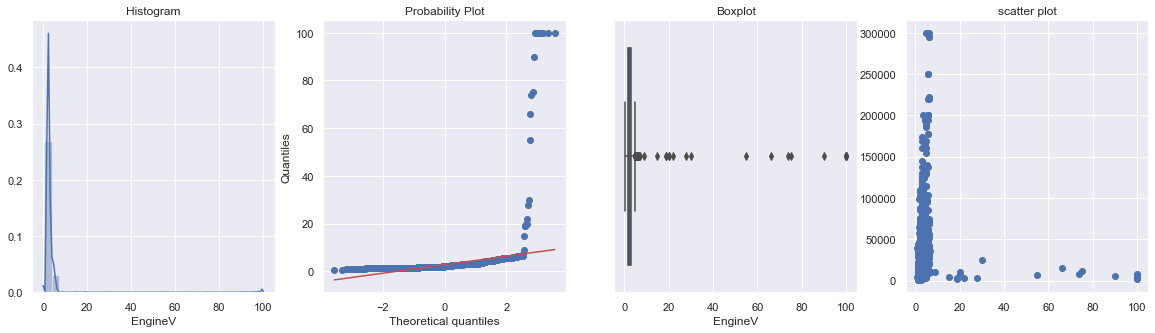

In [26]:
analyse_continuous(df,'EngineV',target)

In [27]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'EngineV', 5)
upper_boundary, lower_boundary

(9.0, -4.2)

In [28]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['EngineV'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['EngineV'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary]) / len(df)))

total number of Year: 3973
cars with more than upper_boundary of Mileage (right end outliers): 20
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.005033979360684621
% left end outliers: 0.0


In [29]:
df = df[(df.EngineV < upper_boundary) & (df.EngineV > lower_boundary)]
df = df.reset_index()
df.shape

(3952, 10)

Skewness: 1.492797
Kurtosis: 2.256621


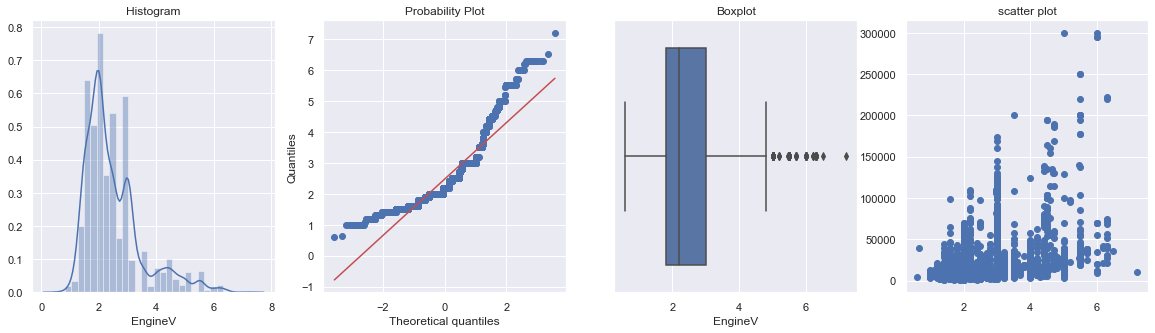

In [30]:
analyse_continuous(df,'EngineV',target)

Price

Skewness: 4.428015
Kurtosis: 28.655122


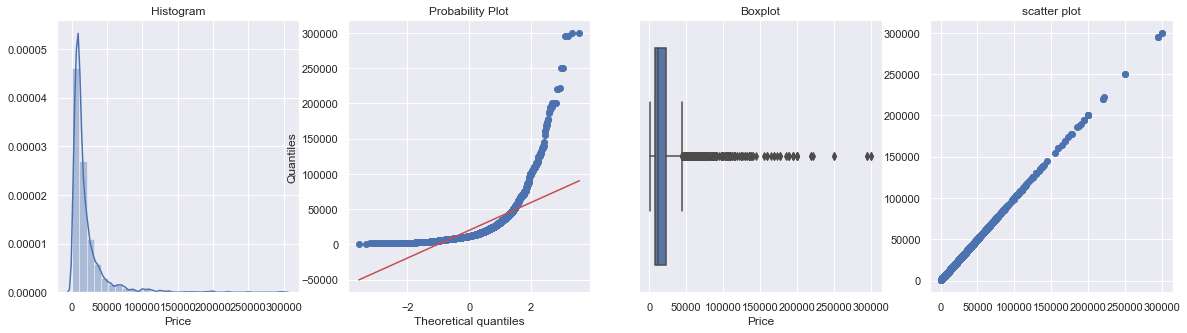

In [31]:
analyse_continuous(df,'Price',target)

In [32]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'Price', 5)
upper_boundary, lower_boundary

(96312.5, -67175.0)

In [33]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['Price'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['Price'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Price'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Price'] < lower_boundary]) / len(df)))

total number of Year: 3952
cars with more than upper_boundary of Mileage (right end outliers): 99
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.025050607287449393
% left end outliers: 0.0


In [34]:
df = df[(df.Price < upper_boundary) & (df.Price > lower_boundary)]
df = df.reset_index(drop = True)
df.shape

(3853, 10)

Skewness: 2.062913
Kurtosis: 4.676606


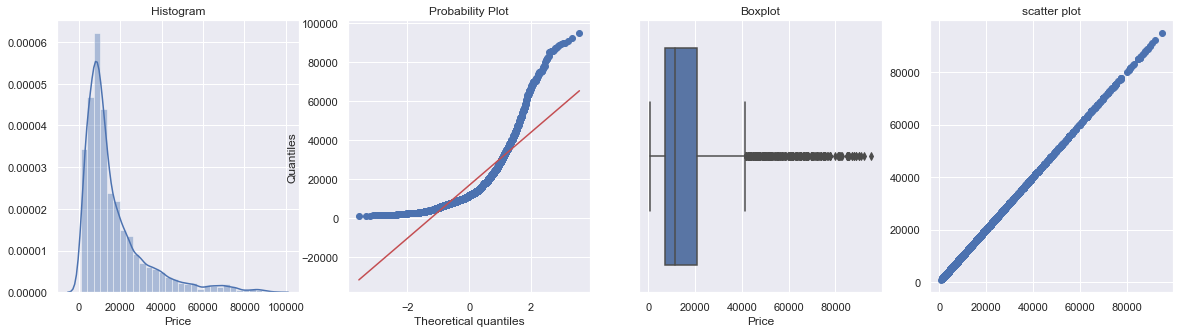

In [35]:
analyse_continuous(df,'Price',target)

In [36]:
df = df.reset_index(drop = True)
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1320.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:30   Log-Likelihood:                -32889.
No. Observations:                3082   AIC:                         6.579e+04
Df Residuals:                    3078   BIC:                         6.581e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.673e+04    188.004     88.977      0.0

#### Exp: 

## 4.6. Gaussian Transformation

#### Exp

+ Use only numerical vars
+ Remove outliers
+ transform Price to have linear relationship

In [37]:
# df = cleaned_df.copy()

In [38]:
df.describe()

,index,Price,Mileage,EngineV,Year
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000
mean,1983.144563,16663.636312,165.216974,2.435674,2006.417597
std,1148.069671,15444.239279,97.236547,0.947300,6.234869
min,0.000000,800.000000,0.000000,0.600000,1987.000000
25%,986.000000,7000.000000,95.000000,1.800000,2003.000000
50%,1983.000000,11400.000000,160.000000,2.200000,2007.000000
75%,2977.000000,20800.000000,230.000000,3.000000,2011.000000
max,3972.000000,95000.000000,505.000000,7.200000,2016.000000


Skewness: -0.012007
Kurtosis: -0.228921


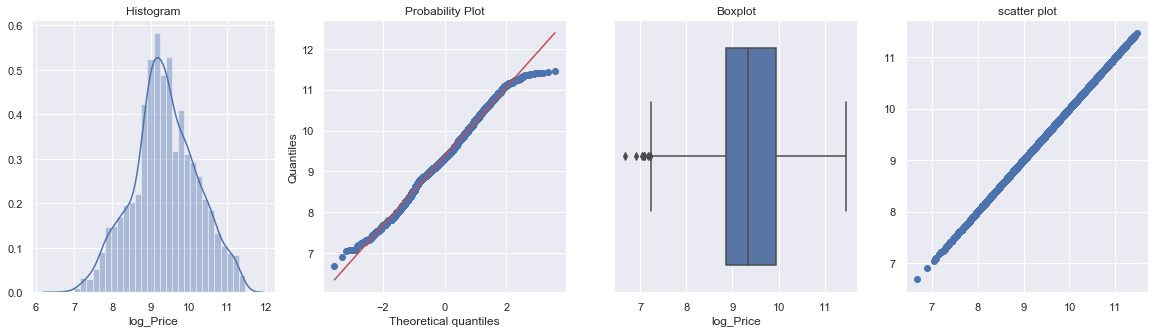

In [39]:
df['log_Price'] = np.log(df['Price'])
target = 'log_Price'
analyse_continuous(df,'log_Price',target)

Skewness: -0.780438
Kurtosis: 0.242738


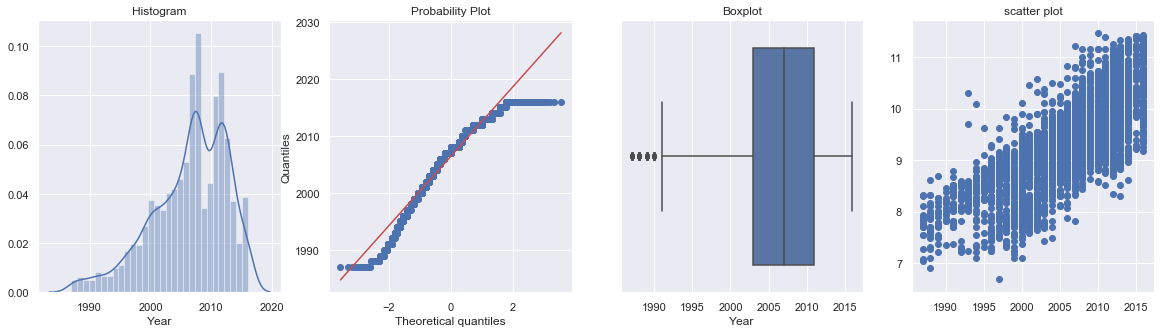

Skewness: 0.383946
Kurtosis: -0.107933


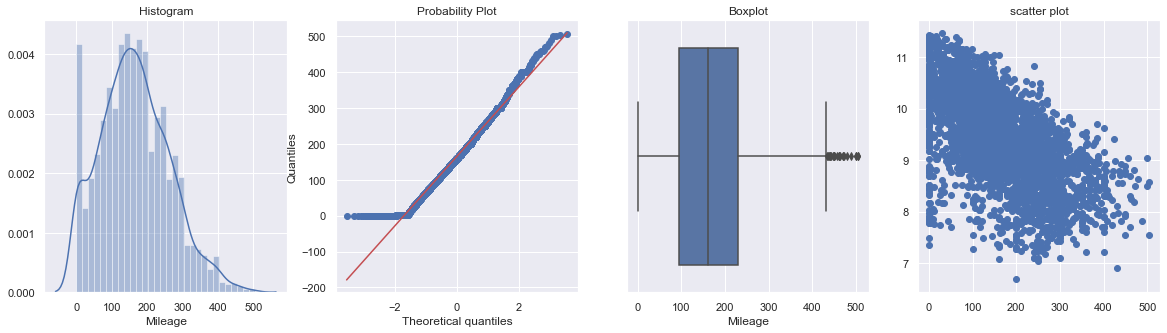

Skewness: 1.541552
Kurtosis: 2.587239


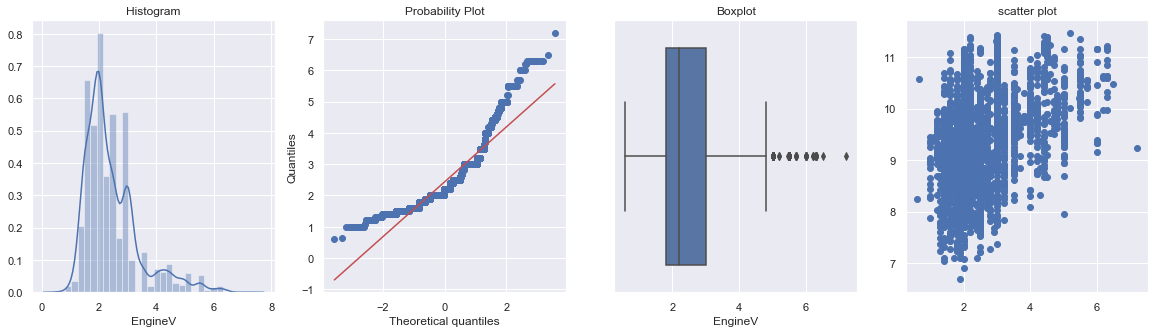

In [40]:
num_vars = ['Year','Mileage','EngineV']
for var in num_vars:
    analyse_continuous(df,var,target)

In [41]:
df = df.reset_index(drop = True)
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2951.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:33   Log-Likelihood:                -1785.7
No. Observations:                3082   AIC:                             3579.
Df Residuals:                    3078   BIC:                             3604.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3673      0.008   1203.202      0.0

## Exp4

+ Use only numerical vars
+ Remove outliers
+ transform Price to have linear relationship
+ transform independent vars to have Normal distribution

In [42]:
# df = cleaned_df.copy()

Skewness: 0.576358
Kurtosis: 0.161468


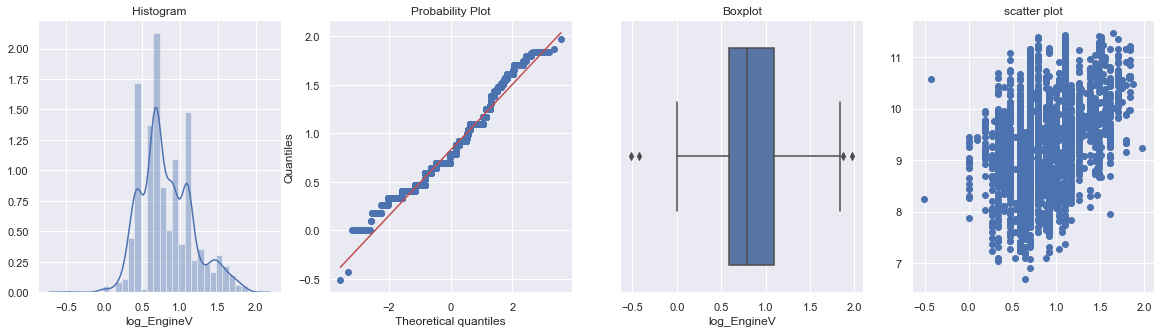

In [43]:
df['log_EngineV'] = np.log(df['EngineV'])
analyse_continuous(df,'log_EngineV',target)

Skewness: -0.784253
Kurtosis: 0.251271


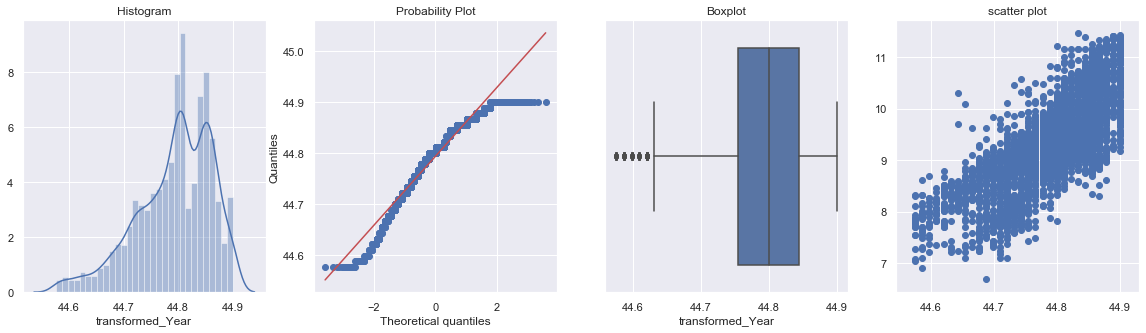

In [44]:
df['transformed_Year'] = df.Year**(1/2)
analyse_continuous(df,'transformed_Year',target)

In [45]:
num_vars  = ['transformed_Year','Mileage','log_EngineV']
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3273.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:35   Log-Likelihood:                -1665.8
No. Observations:                3082   AIC:                             3340.
Df Residuals:                    3078   BIC:                             3364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.3680      0.007  

In [46]:
df['Year_boxcox'], param = stats.boxcox(df.Year) 

print('Optimal λ: ', param)

Optimal λ:  46.89305350689124


C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:908: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Skewness: nan
Kurtosis: nan


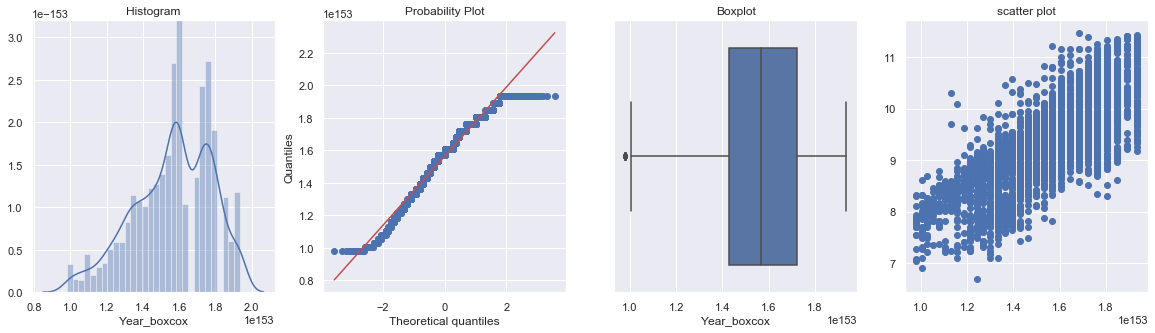

In [47]:
analyse_continuous(df,'Year_boxcox',target)

In [48]:
num_vars  = ['Year_boxcox','Mileage','log_EngineV']
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:36   Log-Likelihood:                -1581.0
No. Observations:                3082   AIC:                             3170.
Df Residuals:                    3078   BIC:                             3194.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.3683      0.007   1285.987      

In [49]:
df[num_vars].corr()

,Year_boxcox,Mileage,log_EngineV
Year_boxcox,0.0,-0.000000,-0.000000
Mileage,-0.0,1.000000,0.063108
log_EngineV,-0.0,0.063108,1.000000


In [50]:
num_vars  = ['Year','Mileage','log_EngineV']
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3276.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:36   Log-Likelihood:                -1664.7
No. Observations:                3082   AIC:                             3337.
Df Residuals:                    3078   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.3680      0.007   1251.484      

In [51]:
cat_vars = ['Brand', 'Body', 'EngineType', 'Model']

print('Cat vars: ', cat_vars)
print('Taret: ', target)
print('Num vars: ', num_vars)

Cat vars:  ['Brand', 'Body', 'EngineType', 'Model']
Taret:  log_Price
Num vars:  ['Year', 'Mileage', 'log_EngineV']


# 5. Categorical vars

## 5.1. Engineering mixed vars

https://www.geeksforgeeks.org/python-extract-numbers-from-string/

https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8


In [52]:
print(len(df.Model.unique()))
df.Model.unique()

294


array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'A6', 'Megane',
       'Golf IV', '19', 'A6 Allroad', 'Passat B6', 'Land Cruiser 100',
       'Clio', '318', 'Hilux', 'Polo', 'Outlander', 'A8', 'Touareg',
       'Vito', 'Colt', '100', 'Z4', 'Pajero Wagon', 'X5', 'Caddy',
       'Camry', '528', 'TT', 'G 55 AMG', 'X6', 'Galant', '525', 'Kangoo',
       'ML 350', '730', 'Trafic', 'S 350', 'Lancer', 'E-Class', 'Scenic',
       '330', 'Passat B5', 'A3', 'Land Cruiser Prado', 'Caravelle',
       'Avensis', 'GL 320', 'GL 450', 'Lancer X', '200', '520', 'Tiguan',
       'Outlander XL', 'A5', 'X6 M', 'Golf III', 'A 150', 'FJ Cruiser',
       'Koleos', 'Passat B7', 'Scirocco', 'M5', 'Venza', 'V 250',
       'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240', 'I3',
       'Multivan', 'Vaneo', 'X1', 'T5 (Transporter) ', 'S 400', 'S 550',
       'Passat CC', 'A4 Allroad', 'Passat B4', 'Golf II', 'L 200',
       'Jetta', 'Logan', 'P

#### Exp: create dummy vars for all labels without removing first var

#### Exp: create dummy vars for all labels with removing first var

In [53]:
dummy_df = pd.get_dummies(df.Model, drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 293)


,100,11,116,118,120,19,190,200,210,220,230,25,250,300,316,318,320,323,324,325,328,330,335,4 Series Gran Coupe,428,4Runner,5,5 Series,5 Series GT,520,523,524,525,528,530,535,540,545,550,6 Series Gran Coupe,630,640,645,650,730,735,740,745,750,760,80,9,90,A 140,A 150,A 170,A 180,A1,A3,A4,A4 Allroad,A5,A6,A6 Allroad,A7,A8,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B 170,B 180,B 200,Beetle,Bora,C-Class,CL 180,CL 500,CL 55 AMG,CL 550,CL 63 AMG,CLA 200,CLA 220,CLA-Class,CLC 180,CLC 200,CLK 200,CLK 220,CLK 230,CLK 240,CLK 280,CLK 320,CLK 430,CLS 350,CLS 500,CLS 63 AMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,Corolla Verso,Cross Touran,Dokker,Duster,E-Class,Eclipse,Eos,Espace,FJ Cruiser,Fluence,Fortuner,G 320,G 500,G 55 AMG,G 63 AMG,GL 320,GL 350,GL 420,GL 450,GL 500,GL 550,GLC-Class,GLE-Class,GLK 220,GLK 300,GLS 350,Galant,Golf GTI,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,I3,IQ,Jetta,Kangoo,Koleos,L 200,LT,Laguna,Lancer,Lancer Evolution,Lancer X,Lancer X Sportback,Land Cruiser 100,Land Cruiser 105,Land Cruiser 200,Land Cruiser 76,Land Cruiser 80,Land Cruiser Prado,Latitude,Logan,Lupo,M5,M6,MB,ML 250,ML 270,ML 280,ML 320,ML 350,ML 400,ML 430,ML 500,ML 550,ML 63 AMG,Mark II,Master,Matrix,Megane,Modus,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Pinin,Pajero Sport,Pajero Wagon,Passat B2,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Pointer,Polo,Previa,Prius,Q3,Q5,Q7,R 320,R8,Rav 4,S 140,S 250,S 300,S 320,S 350,S 400,S 420,S 430,S 500,S 550,S 600,S 63 AMG,S 65 AMG,S4,S5,S8,SL 500 (550),SL 55 AMG,SLK 200,SLK 350,Sandero,Sandero StepWay,Scenic,Scion,Scirocco,Sequoia,Sharan,Sienna,Smart,Space Star,Space Wagon,Sprinter,Sprinter 208,Sprinter 210,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 311,Sprinter 312,Sprinter 313,Sprinter 315,Sprinter 316,Sprinter 318,Sprinter 319,Symbol,Syncro,T3 (Transporter),T4 (Transporter),T4 (Transporter),T5 (Transporter),T5 (Transporter),T6 (Transporter),T6 (Transporter),TT,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V 250,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [54]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     69.27
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:36   Log-Likelihood:                -662.67
No. Observations:                3082   AIC:                             1895.
Df Residuals:                    2797   BIC:                             3615.
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year                    0.6036    

In [55]:
df.Model.dtype

dtype('O')

In [56]:
import re 

def LetterPart_Extraction(init_string):
    # letter_part = " ".join(re.findall("[a-zA-Z]+", ini_string)) 
    letter_part = ''.join(filter(lambda chr: chr.isalpha(), init_string))
    return letter_part

def NumberPart_Extraction(init_string):
    # number_part = [int(s) for s in init_string.split() if s.isdigit()]
    number_part = ''.join(filter(lambda i: i.isdigit(), init_string))
    # number_part = list(map(int, re.findall(r'\d+', init_string))) 
    return number_part

df['Model_categorical'] = df.Model.apply(lambda x:LetterPart_Extraction(x))
df['Model_numerical'] = df.Model.apply(lambda x:NumberPart_Extraction(x))
df.head(5)

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_Price,log_EngineV,transformed_Year,Year_boxcox,Model_categorical,Model_numerical
0,0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840,0.693147,44.620623,1.077498e+153,,320
1,1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618,1.064711,44.710178,1.300416e+153,Sprinter,212
2,2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519,1.609438,44.754888,1.428213e+153,S,500
3,3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249,1.435085,44.799554,1.568275e+153,Q,7
4,4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656,0.693147,44.844175,1.721751e+153,Rav,4


## 5.2. High cardinality



In [57]:
print(len(df.Model_categorical.unique()))
df.Model_categorical.unique()

152


array(['', 'Sprinter', 'S', 'Q', 'Rav', 'A', 'Megane', 'GolfIV',
       'AAllroad', 'PassatB', 'LandCruiser', 'Clio', 'Hilux', 'Polo',
       'Outlander', 'Touareg', 'Vito', 'Colt', 'Z', 'PajeroWagon', 'X',
       'Caddy', 'Camry', 'TT', 'GAMG', 'Galant', 'Kangoo', 'ML', 'Trafic',
       'Lancer', 'EClass', 'Scenic', 'LandCruiserPrado', 'Caravelle',
       'Avensis', 'GL', 'LancerX', 'Tiguan', 'OutlanderXL', 'XM',
       'GolfIII', 'FJCruiser', 'Koleos', 'Scirocco', 'M', 'Venza', 'V',
       'CClass', 'Lupo', 'Series', 'CLA', 'TTransporter', 'Highlander',
       'Corolla', 'CLK', 'I', 'Multivan', 'Vaneo', 'PassatCC', 'GolfII',
       'L', 'Jetta', 'Logan', 'PajeroSport', 'LancerXSportback',
       'GolfPlus', 'Up', 'Amarok', 'G', 'Auris', 'CL', 'Master', 'Dokker',
       'GolfVI', 'GolfVII', 'Laguna', 'NewBeetle', 'Pajero', 'Viano',
       'Sharan', 'Prius', 'B', 'Fluence', 'Duster', 'Hiace', 'CLC',
       'GolfV', 'Fortuner', 'LT', 'Symbol', 'Yaris', 'Espace',
       'GolfVariant', 'T

In [58]:
dummy_df = pd.get_dummies(df.Model_categorical, drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 151)


,A,AAllroad,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B,Beetle,Bora,CClass,CL,CLA,CLAClass,CLAMG,CLC,CLK,CLS,CLSAMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,CorollaVerso,CrossTouran,Dokker,Duster,EClass,Eclipse,Eos,Espace,FJCruiser,Fluence,Fortuner,G,GAMG,GL,GLCClass,GLEClass,GLK,GLS,Galant,GolfGTI,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GolfVariant,GrandScenic,Grandis,Hiace,Highlander,Hilux,I,IQ,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerEvolution,LancerX,LancerXSportback,LandCruiser,LandCruiserPrado,Latitude,Logan,Lupo,M,MB,ML,MLAMG,MarkII,Master,Matrix,Megane,Modus,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroPinin,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Pointer,Polo,Previa,Prius,Q,R,Rav,Runner,S,SAMG,SL,SLAMG,SLK,Sandero,SanderoStepWay,Scenic,Scion,Scirocco,Sequoia,Series,SeriesGT,SeriesGranCoupe,Sharan,Sienna,Smart,SpaceStar,SpaceWagon,Sprinter,Symbol,Syncro,TT,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X,XM,Yaris,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:37   Log-Likelihood:                -956.55
No. Observations:                3082   AIC:                             2211.
Df Residuals:                    2933   BIC:                             3110.
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Year                 0.6001      0.010  

In [60]:
selected_list = ['Model_categorical','Brand','Body','Engine Type']
def analyse_frequency_labels(df, var):
    df = df.copy()
    tmp = df[var].value_counts() / len(df)
    return tmp

for var in selected_list:
    print(analyse_frequency_labels(df, var))
    print()

                    0.123021
A                   0.073449
PassatB             0.052167
EClass              0.047495
X                   0.043343
Vito                0.040488
TTransporter        0.038931
Kangoo              0.034259
Camry               0.032961
Caddy               0.028549
S                   0.025954
Megane              0.022061
Q                   0.019725
LandCruiserPrado    0.019465
Trafic              0.018427
Touareg             0.016870
Polo                0.015313
CClass              0.013496
Rav                 0.012977
Lancer              0.012717
LancerX             0.012717
Corolla             0.012458
LandCruiser         0.012458
PajeroWagon         0.012458
ML                  0.011420
Jetta               0.010641
Sprinter            0.008565
Avensis             0.007527
Auris               0.007267
Laguna              0.007008
Galant              0.007008
Outlander           0.007008
PajeroSport         0.006748
AAllroad            0.006748
GL            

#### Problems with high cardinality

## 5.3. Rare values

In [61]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(df, variable):
    
    # find the most frequent category
    frequent_cat = df.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = df.groupby([variable])[variable].count()/np.float(len(df))
    rare_cat = [x for x in temp.loc[temp<0.015].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    df[variable+'_freq_imp'] = np.where(df[variable].isin(rare_cat), frequent_cat, df[variable])
    
    # by adding a new label 'Rare'
    df[variable+'_rare_imp'] = np.where(df[variable].isin(rare_cat), 'Rare', df[variable])

In [62]:
# impute rare labels
rare_imputation(df, 'Model_categorical')

# visualise the transformed dataset
df[['Model_categorical', 'Model_categorical_rare_imp', 'Model_categorical_freq_imp']].head(10)

,Model_categorical,Model_categorical_rare_imp,Model_categorical_freq_imp
0,,,
1,Sprinter,Rare,
2,S,S,S
3,Q,Q,Q
4,Rav,Rare,
5,,,
6,A,A,A
7,Megane,Megane,Megane
8,GolfIV,Rare,
9,Megane,Megane,Megane


In [63]:
len(df.Model_categorical_rare_imp.unique())

18

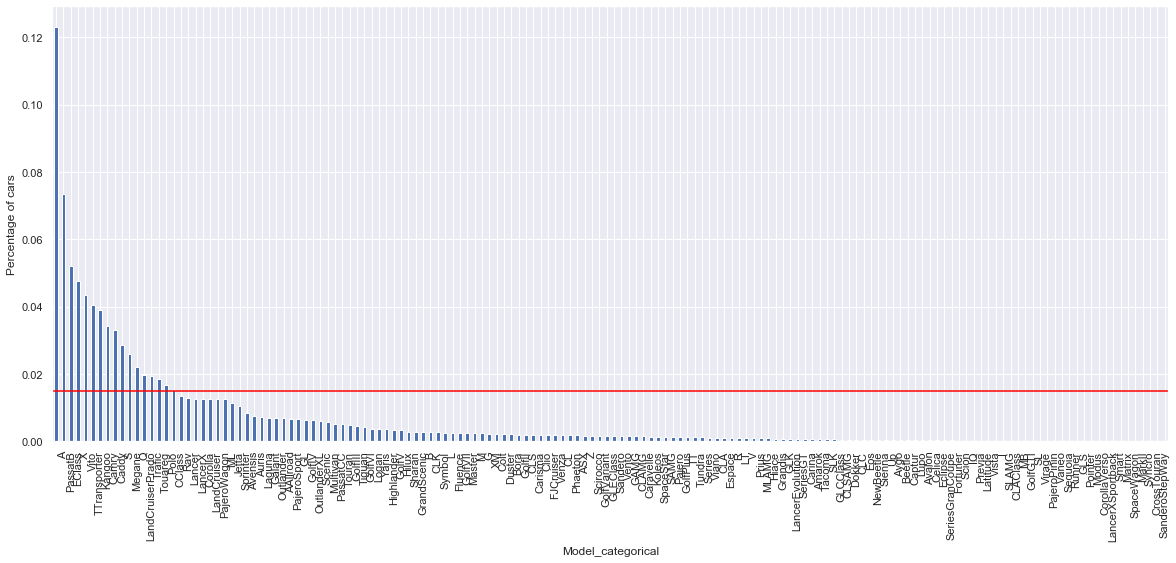

In [64]:
total_cars = len(df)
selected_list = ['Model_categorical']

# for each categorical variable
for col in selected_list:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(df[col].value_counts() / total_cars)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar(figsize = (20,8))
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.015, color='red')
    fig.set_ylabel('Percentage of cars')
    plt.show()

In [65]:
# the following function calculates:

# 1) the percentage of houses per category
# 2) the mean SalePrice per category


def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['log_Price'].mean().reset_index(),
                            on=var,how='left')

    return temp_df

In [66]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(df, 'Model_categorical')
temp_df

,Model_categorical,perc_houses,log_Price
0,,0.123021,9.057579
1,A,0.073449,9.096497
2,PassatB,0.052167,9.019931
3,EClass,0.047495,9.187575
4,X,0.043343,10.385503
5,Vito,0.040488,9.230025
6,TTransporter,0.038931,9.175898
7,Kangoo,0.034259,8.702135
8,Camry,0.032961,9.598618
9,Caddy,0.028549,9.089045


C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


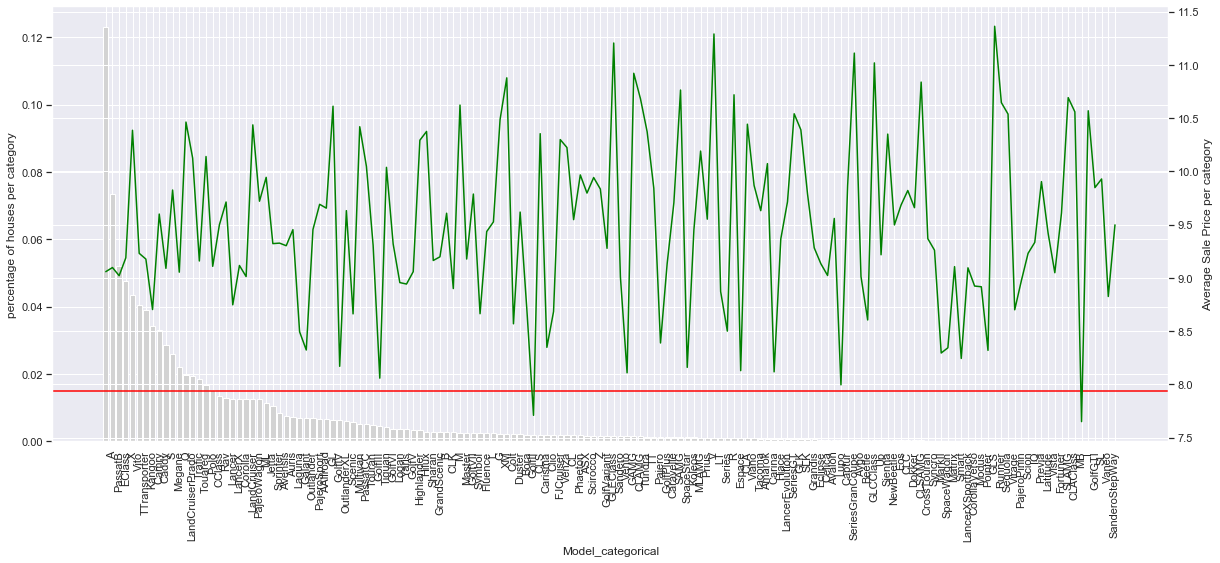

In [67]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["log_Price"], color='green', label='Seconds')
    ax.axhline(y=0.015, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()
    
plot_categories(temp_df, 'Model_categorical')

In [68]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.01].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [69]:
# group rare labels in Neighborhood

df['Model_categorical_grouped'] = group_rare_labels(df, 'Model_categorical')

df[['Model_categorical', 'Model_categorical_grouped']].head(10)

,Model_categorical,Model_categorical_grouped
0,,
1,Sprinter,rare
2,S,S
3,Q,Q
4,Rav,Rav
5,,
6,A,A
7,Megane,Megane
8,GolfIV,rare
9,Megane,Megane


C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


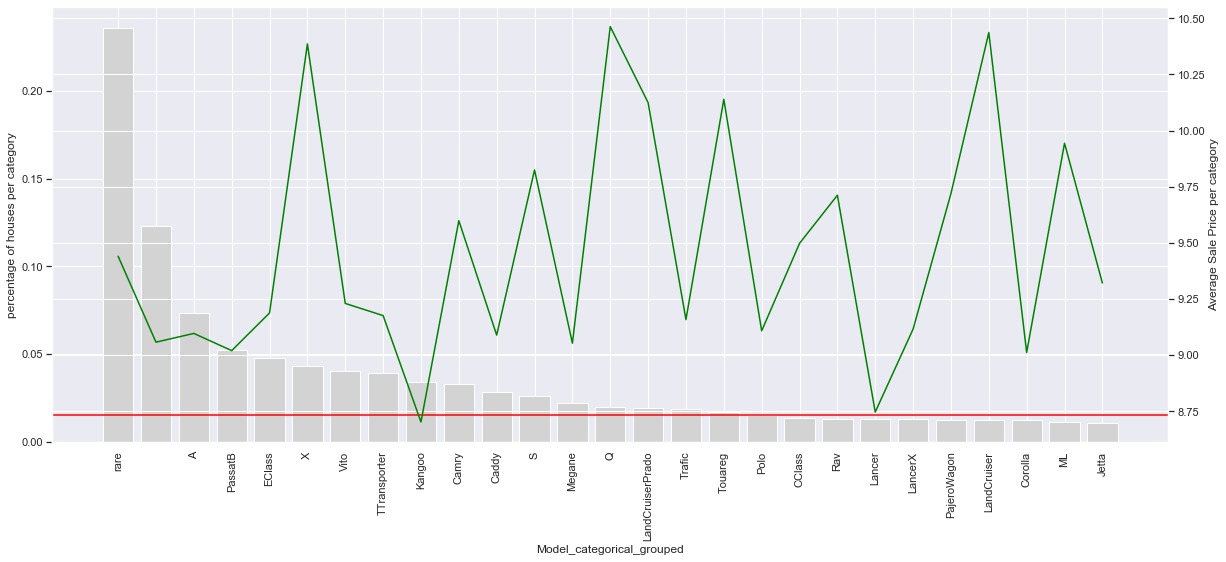

In [70]:
# let's plot Neighborhood with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(df, 'Model_categorical_grouped')
plot_categories(temp_df, 'Model_categorical_grouped')

In [71]:
df.Model_categorical_grouped.nunique()

27

In [72]:
dummy_df = pd.get_dummies(df[['Model_categorical_grouped']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 26)


,Model_categorical_grouped_A,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     432.3
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:48   Log-Likelihood:                -1360.6
No. Observations:                3082   AIC:                             2781.
Df Residuals:                    3052   BIC:                             2962.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### 5.2.3. Encode categorical vars

#### Brand

In [74]:
dummy_df = pd.get_dummies(df[['Brand','Model_categorical_grouped']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 32)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Model_categorical_grouped_A,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     418.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:48   Log-Likelihood:                -1161.6
No. Observations:                3082   AIC:                             2395.
Df Residuals:                    3046   BIC:                             2612.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

#### Body

In [76]:
dummy_df = pd.get_dummies(df[['Brand','Model_categorical_grouped','Body']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 37)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Model_categorical_grouped_A,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     378.7
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:48   Log-Likelihood:                -1117.3
No. Observations:                3082   AIC:                             2317.
Df Residuals:                    3041   BIC:                             2564.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

#### Engine Type

In [78]:
dummy_df = pd.get_dummies(df[['Brand','Model_categorical_grouped','Engine Type','Body']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 40)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Model_categorical_grouped_A,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [79]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     353.4
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:07:49   Log-Likelihood:                -1112.1
No. Observations:                3082   AIC:                             2312.
Df Residuals:                    3038   BIC:                             2578.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

#### Registration

In [81]:
dummy_df = pd.get_dummies(df[['Brand','Model_categorical_grouped','Engine Type','Body','Registration']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 41)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Model_categorical_grouped_A,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Registration_yes
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [82]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     702.9
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:18:18   Log-Likelihood:                -152.88
No. Observations:                3082   AIC:                             395.8
Df Residuals:                    3037   BIC:                             667.3
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [83]:
dummy_df = pd.get_dummies(df[['Brand','Engine Type','Body','Registration']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3853, 15)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Registration_yes
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [84]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1351.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:22:52   Log-Likelihood:                -498.01
No. Observations:                3082   AIC:                             1034.
Df Residuals:                    3063   BIC:                             1149.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3687    